In [6]:
import numpy as np 
def estimate_coef(x,y):
    n = np.size(x)

    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0,b_1)
    



In [7]:
def plot_regression_line(x,y,b):
    plt.scatter(x,y,color = "m",
                marker = "o",s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x,y_pred,color="g")
    plt.xlabel('x')
    plt.ylabel('y')



In [12]:
import numpy as np

def main():
    x = np.array([0,1,2,3,4,5,6,7,8,9])
    y = np.array([1,3,2,5,7,8,8,9,10,12])
    b = estimate_coef(x, y)
    print("estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))

In [13]:
main()

estimated coefficients:
b_0 = 1.2363636363636363
b_1 = 1.1696969696969697


In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
import pandas as pd

In [17]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)


In [18]:
X = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
y = raw_df.values[1::2,2]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
print('coefficients: ',reg.coef_)
print('variance score: {}'.format(reg.score(X_test,y_test)))

coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
variance score: 0.7209056672661756


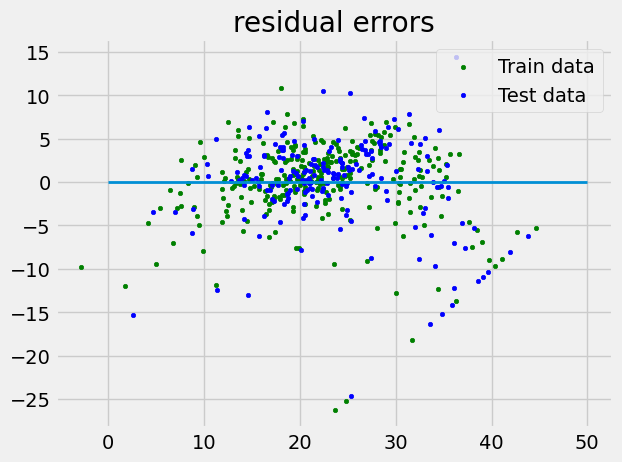

In [23]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train),reg.predict(X_train) - y_train,color="green",s=10,label='Train data')
plt.scatter(reg.predict(X_test),reg.predict(X_test) - y_test,color="blue",s=10,label='Test data')
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)
plt.legend(loc='upper right')
plt.title("residual errors")
plt.show()